In [155]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

In [110]:
# Let's start with the profile, which is the most tricky part of the game:
# This piece of code show how to calculate the Voigt profile, which is an essential 
# part of the M-E inversion.

from scipy.special import wofz

# This is the original formulation of Voigt function, by using wofz
def V(x, alpha, gamma):
    
    #Return the Voigt line shape at x with Lorentzian component HWHM gamma
    #and Gaussian component HWHM alpha.

    sigma = alpha / np.sqrt(2 * np.log(2))

    return np.real(wofz((x + 1j*gamma)/sigma/np.sqrt(2))) / sigma /np.sqrt(2*np.pi)



# This is a formulation where we "normalize" the wavelengths in order to get a dimensionless
# wavelength. It should work either way...

# center = lambda_0
# doppler = doppler widht
# damp = damping, in units of doppler broadening
# ll = wavelength array

def voigt(center,doppler,damp,ll):
    
    # we often call this reduced wavelength:
    doppler *= 1.17 # to convert to halfwidht half maximum
    xx = (ll - center)/doppler
    return V(xx,1.0,damp)

In [173]:
def fs_zero(tau, S, eta, vlos, dld, a, B, ll):
    
    llambda0 = 6000.0 # (this will probably be a method, 
    #so we will have access to this, or so on)
    
    ND = len(tau)
    NL = len(ll)
    
    profile = np.zeros([ND,NL])
    
    for d in range(0,ND):
        profile[d] = voigt(llambda0*(1+vlos[d]/3E5), dld[d], a[d], ll)
        
    tau_l = tau[:,None] * (1+eta[:,None] * profile[:,:])
    
    I = np.zeros(NL)
    I[:] = S[-1]
    
    for d in range(ND-2,-1,-1):
        
        delta = tau_l[d+1] - tau_l[d]
        
        I = I*np.exp(-delta) + 0.5*(S[d+1]+S[d])*(1.-np.exp(-delta))
        
    return I

In [174]:
falc = np.loadtxt("/home/milic/codes/snapi/cfg/falc.dat",unpack=True,skiprows=1)

In [175]:
falc.shape

(12, 57)

In [176]:
S = falc[2]
tau = 10.**falc[0]
eta = np.zeros(57)
eta[:] = 100.0
vlos = np.zeros(57)
vlos[:] = np.linspace(-10,10,57)
vlos[:] = 0.0
dld = np.zeros(57)
dld[:] = 4.0 / 3E5 * 6000.0
a = 10.** np.linspace(-6.0,-1.0,57)

In [177]:
ll = np.linspace(5999,6001,401)

In [192]:
I = fs_zero(tau, S, eta, vlos, dld, a, 0, ll)

In [193]:
I = (I - np.min(I)) / (np.max(I)-np.min(I)) * (2.8E13 - 3.8E12) + 3.8E12

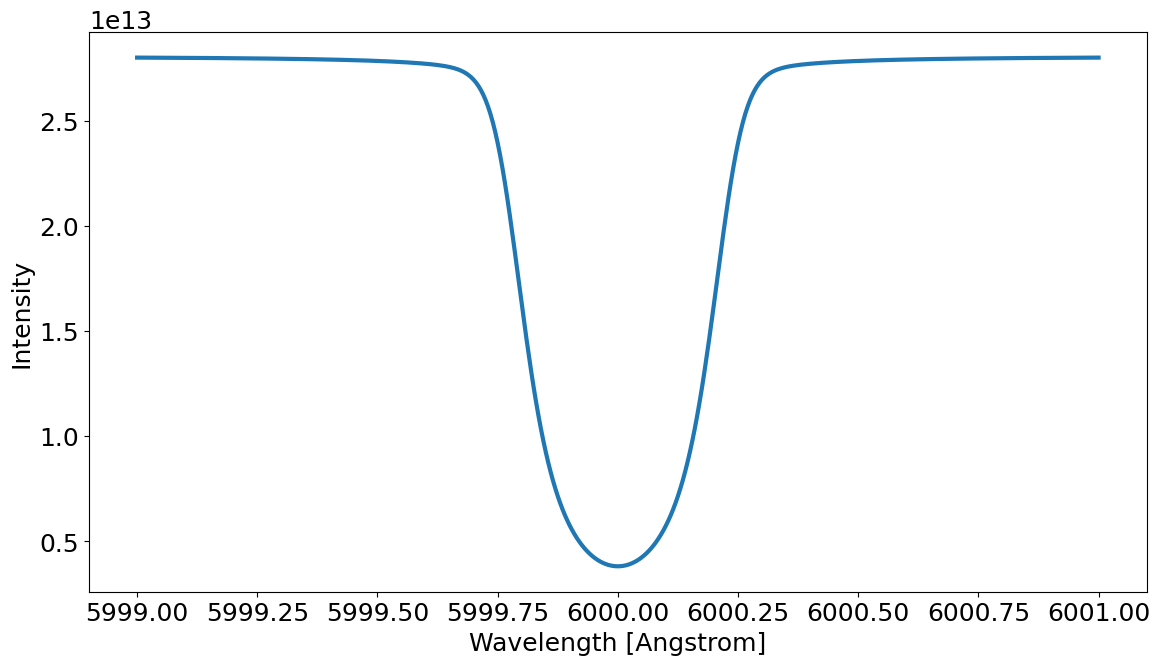

In [194]:


plt.figure(figsize=[12,7])
plt.plot(ll,I, lw =3)
plt.ylabel("Intensity")
plt.xlabel("Wavelength [Angstrom]")
plt.tight_layout()
plt.savefig("/home/milic/codes/experimental_astrophysics/lec_11/line0.png",bbox_inches='tight')


How about the Zeeman effect?

In [210]:
def calc_strenghts(gl, gu, Jl, Ju):
    
    # We want this to be a method of some sort, or to store results. 
    
    # Number of sub-transitions: 
    
    nm_p = int(min(2*Ju,2*Jl) + 1)
    nm_b = nm_r = int((Ju+Jl))
    
    print (nm_p, nm_b, nm_r)
    
    Sp = np.zeros(nm_p)
    Sb = np.zeros(nm_b)
    Sr = np.zeros(nm_r)
    
    dlp = np.zeros(nm_p)
    dlb = np.zeros(nm_b)
    dlr = np.zeros(nm_r)
    
    if (Ju == Jl):
        
        # Pi component:
        
        norm_p = 0.
        norm_total = 0.
        
        mi = np.arange(nm_p)*1.0 - Ju
        Sp = mi**2.0
        delta_lambda_p = mi * (gl - gu)
        norm_p = np.sum(Sp)
        norm_total += np.sum(Sp)
        
        # B/R components
        
        norm_b = norm_r = 0.
        
        # B:
        mi = np.arange(nm_b) - Ju + 1.0
        Sb = 0.5 * (Ju+mi)* (Ju-mi+1.0)
        norm_b = np.sum(Sb)
        norm_total += np.sum(Sb)
        
        #R:
        
        mi = np.arange(nm_r) - Ju
        Sr = 0.5 * (Ju -mi)* (Ju+mi+1.0)
        norm_r = np.sum(Sr)
        norm_total += np.sum(Sr)
        
        # Normalize stuff:
        
        Sp /= norm_p
        Sr /= norm_r 
        Sb /= norm_b 
        
        print (Sp, Sr, Sb)
    
    

def calc_profiles(B, theta, phi, gl, gu, Jl, Ju):
    
    F_p = F_b = F_r = 0.0
    H_p = H_b = H_r = 0.0
    
    # We will need to calculate the strengths 
    
    
    
    

In [213]:
calc_strenghts(1.0,1.0,5/2,5/2)

6 5 5
[0.35714286 0.12857143 0.01428571 0.01428571 0.12857143 0.35714286] [0.14285714 0.22857143 0.25714286 0.22857143 0.14285714] [0.14285714 0.22857143 0.25714286 0.22857143 0.14285714]
